Trabajando a partir de este dataset
https://www.kaggle.com/mdabbert/ultimate-ufc-dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime 
%matplotlib inline
#ctrl + cmd + - (para comentar varias lineas)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UFC Analysis/ufc-master.csv')

In [ ]:
data

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,...,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout,country_fixed
0,Curtis Blaydes,Derrick Lewis,-400.0,300.0,25.000000,300.000000,2/20/2021,"Las Vegas, Nevada, USA",USA,Blue,False,Heavyweight,MALE,5,0,4,0,2.590000,0.50,0.000000,0.520000,0.26,6,5,2,1,0,0,0,0,0,0,16,Orthodox,190.50,200.66,260,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA
1,Ketlen Vieira,Yana Kunitskaya,-278.0,215.0,35.971223,215.000000,2/20/2021,"Las Vegas, Nevada, USA",USA,Blue,False,Women's Bantamweight,FEMALE,3,0,2,0,4.220000,0.57,0.200000,1.620000,0.53,2,2,1,1,0,0,0,0,0,0,4,Orthodox,167.64,172.72,135,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA
2,Charles Rosa,Darrick Minner,-190.0,150.0,52.631579,150.000000,2/20/2021,"Las Vegas, Nevada, USA",USA,Blue,False,Featherweight,MALE,3,0,2,0,3.240000,0.70,3.600000,3.000000,0.62,2,2,0,0,0,0,0,0,0,0,2,Orthodox,170.18,175.26,145,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA
3,Aleksei Oleinik,Chris Daukaus,140.0,-177.0,140.000000,56.497175,2/20/2021,"Las Vegas, Nevada, USA",USA,Blue,False,Heavyweight,MALE,3,0,3,0,11.780000,0.61,0.000000,0.000000,0.00,3,0,0,0,0,0,0,0,0,0,3,Orthodox,190.50,193.04,250,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA
4,Phil Hawes,Nassourdine Imavov,NaN,NaN,NaN,NaN,2/20/2021,"Las Vegas, Nevada, USA",USA,Red,False,Middleweight,MALE,3,1,0,0,4.170000,0.61,2.000000,0.500000,0.12,1,1,0,0,0,0,0,0,0,0,1,Orthodox,190.50,190.50,185,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,Duane Ludwig,Darren Elkins,-155.0,135.0,64.516129,135.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,3,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,Orthodox,177.80,180.34,145,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,KO/TKO,NaN,1.0,0:44,44.0,0.0,0.0,1.0,0.0,5.0,2.0,0.20,0.00,1.0,0.0,5.0,2.0,0.0,1.0,0.0,2.0,0.00,0.5,0.0,0.0,0.0,0

In [ ]:
#list(data.columns)

In [ ]:
#Select the columns we are going to work with
df = data[['R_fighter', 'B_fighter', 'date', 'gender','Winner', 'title_bout', 'weight_class', 'no_of_rounds', 
 'finish_round', 'finish_round_time', 'finish', 'finish_details','total_fight_time_secs', 
 'R_sig_str_landed_bout', 'B_sig_str_landed_bout', 
 'R_tot_str_landed_bout', 'B_tot_str_landed_bout',
 'R_match_weightclass_rank','B_match_weightclass_rank', 
 'R_age',
 'B_age',
 ]]

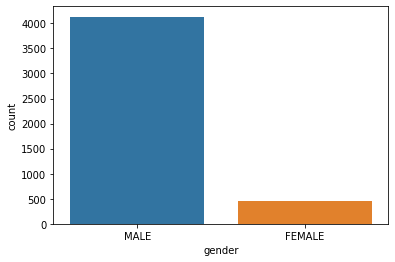

In [ ]:
# Number of fights by genre since 2010
sns.countplot(x='gender', data=df)

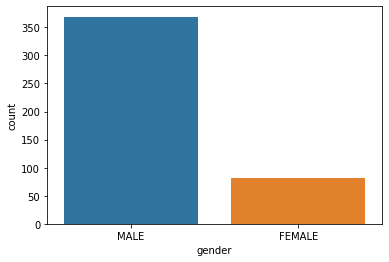

In [ ]:
#Number of fights by gender in 2020
sns.countplot(x='gender', data=df[df['date'].str.slice(-4) == '2020'])

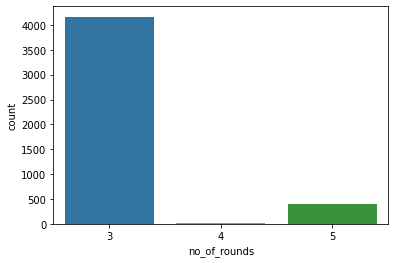

In [ ]:
#UFC fights have either 3 rounds for normal fights or 5 rounds for main events or title fights
sns.countplot(x='no_of_rounds', data=df)

In [ ]:
'''In early 2005, the UFC created the Ultimate Fighter. 
Sixteen fighters from across the world would compete in a single elimination tournament 
and the last man standing would receive a six figure contract with the UFC.'''

#TUF finals have a "sudden victory" round in the event of a draw as there has to be a winner.
df[df['no_of_rounds'] == 4]

,R_fighter,B_fighter,date,gender,Winner,title_bout,weight_class,no_of_rounds,finish_round,finish_round_time,finish,finish_details,total_fight_time_secs,R_sig_str_landed_bout,B_sig_str_landed_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_match_weightclass_rank,B_match_weightclass_rank,R_age,B_age
1072,Juan Espino,Justin Frazier,11/30/2018,MALE,Red,True,Heavyweight,4,1.0,3:36,SUB,Armbar,216.0,22.0,4.0,44.0,17.0,NaN,NaN,38,29
1073,Pannie Kianzad,Macy Chiasson,11/30/2018,FEMALE,Blue,True,Women's Featherweight,4,2.0,2:11,SUB,Rear Naked Choke,431.0,19.0,24.0,30.0,37.0,NaN,NaN,26,27
1270,Michael Trizano,Joe Giannetti,7/6/2018,MALE,Red,True,Lightweight,4,3.0,5:00,S-DEC,NaN,900.0,NaN,NaN,NaN,NaN,NaN,NaN,26,23
1271,Jay Cucciniello,Brad Katona,7/6/2018,MALE,Blue,True,Featherweight,4,3.0,5:00,U-DEC,NaN,900.0,NaN,NaN,NaN,NaN,NaN,NaN,31,26
1732,Dhiego Lima,Jesse Taylor,7/7/2017,MALE,Blue,True,Welterweight,4,2.0,0:43,SUB,Rear Naked Choke,343.0,NaN,NaN,NaN,NaN,NaN,NaN,28,34
2041,Martin Bravo,Claudio Puelles,11/5/2016,MALE,Red,True,Lightweight,4,2.0,1:55,KO/TKO,Punch,415.0,NaN,NaN,NaN,NaN,NaN,NaN,23,20
2197,Andrew Sanchez,Khalil Rountree Jr.,7/8/2016,MALE,Red,True,Light Heavyweight,4,3.0,5:00,U-DEC,NaN,900.0,NaN,NaN,NaN,NaN,NaN,NaN,28,26
2198,Tatiana Suarez,Amanda Cooper,7/8/2016,FEMALE,Red,True,Women's Strawweight,4,1.0,3:43,SUB,D'Arce Choke,223.0,NaN,NaN,NaN,NaN,NaN,NaN,25,24
2441,Artem Lobov,Ryan Hall,12/11/2015,MALE,Blue,True,Lightweight,4,3.0,5:00,U-DEC,NaN,900.0,2.0,23.0,13.0,169.0,NaN,NaN,29,30
2475,Erick Montano,Enrique Marin,11/21/2015,MALE,Red,True,Welterweight,4,3.0,5:00,S-DEC,NaN,900.0,49.0,27.0,59.0,33.0,NaN,NaN,30,29


Text(0.5, 1.0, 'Finish round distribution')

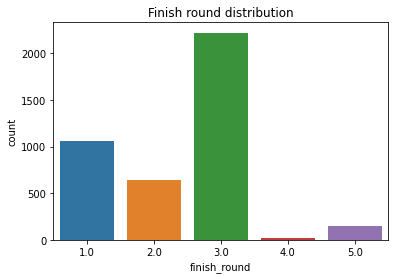

In [ ]:
#Most fights have 3 rounds and finish on the 3º round
sns.countplot(x='finish_round', data=df).set_title('Finish round distribution')


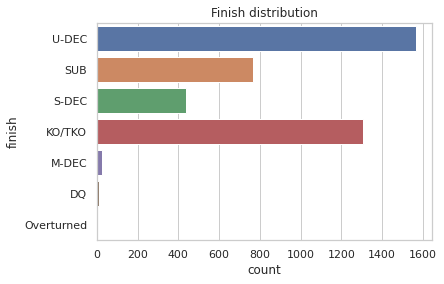

In [ ]:
'''
Unanimous Decision = three judges score a fight for one side.
Submision = the referee or doctor stops the fight because a fighter has sustained an injury or is rendered unconscious while in a submission hold.
Split Decision = two judges score a fight for one side, and a third judge scores it for the other side.
KO/TKO: 
  KO =  when fighter falls to the canvas and is unable to rise to their feet within a specified period of time because of exhaustion, pain, disorientation, or unconsciousness. 
  TKO = the referee decides during a round that a fighter cannot safely continue the match for any reason
Majority Decision = two judges score a fight for one side, and the third judge scores it a draw.
DQ = disqualification
Overturned = due to a failed drug test the fight gets overturned to a 'no contest'
'''
#la mayoria de las peleas terminan con decision unanime, luego por KO/TKO
sns.countplot(y="finish", data=df).set_title('Finish distribution')
plt.show()


In [ ]:
#Here should be the Jon Jones vs Daniel Cormier second fight in 2017, but instead is nowhere in the dataset
df[df['finish'] == 'Overturned']

,R_fighter,B_fighter,date,gender,Winner,title_bout,weight_class,no_of_rounds,finish_round,finish_round_time,finish,finish_details,total_fight_time_secs,R_sig_str_landed_bout,B_sig_str_landed_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_match_weightclass_rank,B_match_weightclass_rank,R_age,B_age
571,Domingo Pilarte,Journey Newson,2/8/2020,MALE,Blue,False,Bantamweight,3,1.0,0:38,Overturned,Punch,38.0,NaN,NaN,NaN,NaN,NaN,NaN,30,30
1115,Chas Skelly,Bobby Moffett,11/10/2018,MALE,Blue,False,Featherweight,3,2.0,2:43,Overturned,D'Arce Choke,463.0,NaN,NaN,NaN,NaN,NaN,NaN,33,28


In [ ]:
#Specific fighter all bouts
fighter = 'Max Holloway'
fighter_df = df[(df['R_fighter'] == fighter) | (data['B_fighter'] == fighter)]
fighter_df

,R_fighter,B_fighter,date,gender,Winner,title_bout,weight_class,no_of_rounds,finish_round,finish_round_time,finish,finish_details,total_fight_time_secs,R_sig_str_landed_bout,B_sig_str_landed_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_match_weightclass_rank,B_match_weightclass_rank,R_age,B_age
54,Max Holloway,Calvin Kattar,1/16/2021,MALE,Red,False,Featherweight,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,29,32
320,Alexander Volkanovski,Max Holloway,7/11/2020,MALE,Red,True,Featherweight,3,5.0,5:00,S-DEC,NaN,1500.0,137.0,102.0,139.0,111.0,0.0,1.0,31,28
539,Max Holloway,Frankie Edgar,7/27/2019,MALE,Red,True,Featherweight,5,5.0,5:00,U-DEC,NaN,1500.0,129.0,96.0,131.0,96.0,0.0,4.0,27,37
777,Max Holloway,Alexander Volkanovski,12/14/2019,MALE,Blue,True,Featherweight,5,5.0,5:00,U-DEC,NaN,1500.0,134.0,157.0,135.0,157.0,0.0,1.0,28,31
885,Max Holloway,Dustin Poirier,4/13/2019,MALE,Blue,True,Lightweight,5,5.0,5:00,U-DEC,NaN,1500.0,181.0,178.0,208.0,180.0,NaN,3.0,27,30
1046,Max Holloway,Brian Ortega,12/8/2018,MALE,Red,True,Featherweight,5,4.0,5:00,KO/TKO,NaN,1200.0,NaN,NaN,NaN,NaN,0.0,1.0,27,27
1525,Max Holloway,Jose Aldo,12/2/2017,MALE,Red,True,Featherweight,5,3.0,4:51,KO/TKO,Punches,891.0,NaN,NaN,NaN,NaN,0.0,1.0,25,31
1774,Jose Aldo,Max Holloway,6/3/2017,MALE,Blue,True,Featherweight,5,3.0,4:13,KO/TKO,Punches,853.0,NaN,NaN,NaN,NaN,0.0,1.0,30,25
1955,Max Holloway,Anthony Pettis,12/10/2016,MALE,Red,True,Featherweight,5,3.0,4:50,KO/TKO,Punches,890.0,94.0,53.0,98.0,55.0,2.0,5.0,25,29
2235,Max Holloway,Ricardo Lamas,6/4/2016,MALE,Red,False,Featherweight,3,3.0,5:00,U-DEC,NaN,900.0,NaN,NaN,NaN,NaN,4.0,5.0,24,34


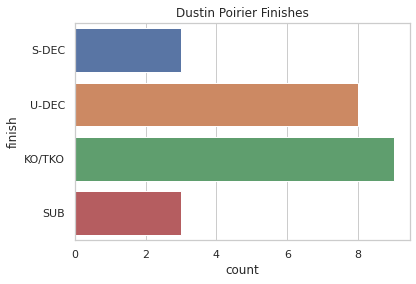

In [ ]:
#Finalizaciones de peleas de luchador especifico (problema!"" aqui se suman tambien las que le aplicaron a el)
sns.countplot(y="finish", data=fighter_df).set_title(fighter + ' Finishes')
plt.show()

Text(0.5, 1.0, 'Dustin Poirier Finish Round Distribution')

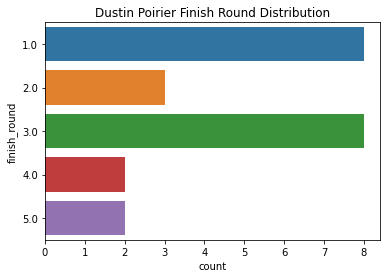

In [ ]:
#Finish round by specific fighter
sns.countplot(y="finish_round", data=fighter_df).set_title(fighter + ' Finish Round Distribution')

In [ ]:
#Strikes landed 
fighter = 'Conor McGregor'
fighter_strikes_R = df[['R_fighter', 'B_fighter', 'date','total_fight_time_secs','R_sig_str_landed_bout','R_tot_str_landed_bout']][(df['R_fighter'] == fighter)]
fighter_strikes_R = fighter_strikes_R.rename(columns={'R_sig_str_landed_bout': 'sig_str_landed', 'R_tot_str_landed_bout': 'tot_str_landed'})

fighter_strikes_B = df[['R_fighter', 'B_fighter', 'date','total_fight_time_secs','B_sig_str_landed_bout','B_tot_str_landed_bout']][(df['B_fighter'] == fighter)]
fighter_strikes_B = fighter_strikes_B.rename(columns={'B_sig_str_landed_bout': 'sig_str_landed', 'B_tot_str_landed_bout': 'tot_str_landed'})

fighter_strikes_total_a = pd.concat([fighter_strikes_R, fighter_strikes_B], axis=0, sort=True)
fighter_strikes_total_a.sort_index()

,B_fighter,R_fighter,date,sig_str_landed,tot_str_landed,total_fight_time_secs
30,Conor McGregor,Dustin Poirier,1/23/2021,NaN,NaN,NaN
716,Donald Cerrone,Conor McGregor,1/18/2020,19.0,20.0,40.0
1144,Conor McGregor,Khabib Nurmagomedov,10/6/2018,NaN,NaN,1083.0
2028,Conor McGregor,Eddie Alvarez,11/12/2016,32.0,40.0,484.0
2128,Conor McGregor,Nate Diaz,8/20/2016,164.0,197.0,1500.0
2329,Nate Diaz,Conor McGregor,3/5/2016,NaN,NaN,552.0
2428,Conor McGregor,Jose Aldo,12/12/2015,5.0,5.0,13.0
2637,Conor McGregor,Chad Mendes,7/11/2015,46.0,74.0,597.0
2858,Dennis Siver,Conor McGregor,1/18/2015,64.0,65.0,414.0
3004,Conor McGregor,Dustin Poirier,9/27/2014,9.0,9.0,106.0


In [ ]:
# Quick fix
cond = (data['country'].str[0] != ' ')
data['country_fixed'] = data['country'].where(cond, data['country'].str[1:])

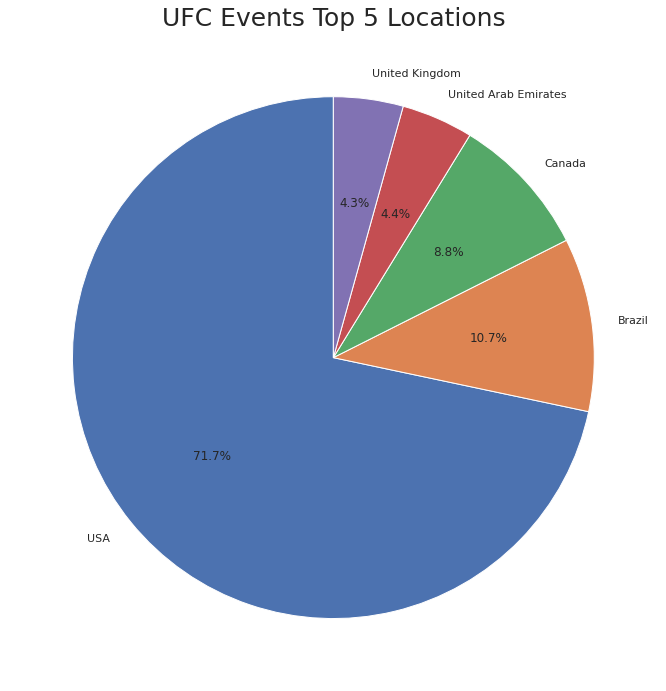

In [ ]:
size = data['country_fixed'].value_counts()
size = size.head()
labels = list(data['country_fixed'].unique())
labels

plt.figure(figsize=(12, 12))
plt.pie(size, labels = size.index,autopct='%1.1f%%', startangle = 90)
plt.title('UFC Events Top 5 Locations', fontsize = 25)

plt.show()

In [ ]:
#No hay API ni Dataset actualizado
#hay paginas como http://statleaders.ufc.com/ o http://ufcstats.com/statistics/events/completed
#En caso de querer añadir mas datos o peleas
#https://pypi.org/project/UFC-Data-Scraper/ Averiguar si esto funciona o hacer Scrapping propio o manual

In [ ]:
'''The dataset is not perfect, has some errors and NaNs, and lacks fights before 2010,
also it hasn't been updated since february 20th'''